In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bokeh.io import push_notebook, show, output_notebook
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, Slider


# Load data
df = pd.read_csv('/Users/afismacbook/Desktop/PROJECTS/DS/DATASETS/studydata.csv')

# Initialize parameters
m = 0
b = 0
L = 0.0001
epochs = 1000
n = len(df)

# Gradient Descent function
def gradient_descent(m_now, b_now, df, L):
    m_gradient = 0
    b_gradient = 0
    for i in range(n):
        x = df.iloc[i, 0]
        y = df.iloc[i, 1]
        m_gradient += -(2/n) * x * (y - (m_now * x + b_now))
        b_gradient += -(2/n) * (y - (m_now * x + b_now))
    m = m_now - (L * m_gradient)
    b = b_now - (L * b_gradient)
    return [m, b]

# Gradient Descent loop
for i in range(epochs):
    m, b = gradient_descent(m, b, df, L)

print("Final m:", m, "Final b:", b)



Final m: 1.4588653376404914 Final b: 0.07765368857654932


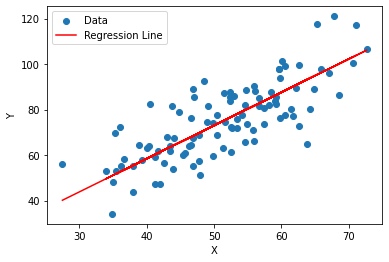

In [21]:
def plot_regression_line(m, b, df):
    plt.scatter(df.iloc[:, 0], df.iloc[:, 1], label='Data')
    plt.plot(df.iloc[:, 0], m * df.iloc[:, 0] + b, color='red', label='Regression Line')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.show()

# Use the final m and b values for plotting
plot_regression_line(m, b, df)


In [22]:
# Define Bokeh interactive plot function
def bokeh_interactive_plot(m, b):
    source = ColumnDataSource(data={'x': df.iloc[:, 0], 'y': df.iloc[:, 1], 'regression': m * df.iloc[:, 0] + b})
    p = figure(title='Interactive Scatter Plot with Regression Line')
    p.scatter('x', 'y', source=source, size=8, legend_label='Data')
    p.line('x', 'regression', source=source, line_width=2, color='red', legend_label='Regression Line')
    p.xaxis.axis_label = 'X'
    p.yaxis.axis_label = 'Y'
    show(p, notebook_handle=True)

# Create interactive widget using Bokeh
output_notebook()
interactive_plot = interactive(bokeh_interactive_plot, m=(-2.0, 2.0), b=(-10.0, 10.0))
output = interactive_plot.children[-1]
output.layout.height = '400px'
interactive_plot

Loading BokehJS ...

interactive(children=(FloatSlider(value=0.0, description='m', max=2.0, min=-2.0), FloatSlider(value=0.0, descr…